# Data in Python

## Stats 141B

## Lecture 4

## Prof. Sharpnack

## Lecture slides at http://anson.ucdavis.edu/~jsharpna/141Blectures/

## Lecture repository at https://github.com/jsharpna/141Blectures/

### Built in data structures:

**Sequences:**
- list
- tuple
- string

**Numeric:**
- boolean
- integer
- float

**Mappings: dictionaries, sets**

**Exceptions, Classes**

## Recap

We left off last time with

- `header`: string of header with , separated 
- `davis.dat`: file with lines containing UC Davis in college scorecard

In [24]:
## Let's extract and plot the undergraduate population from dataset

davis_lines = [] # empty list
with open('CollegeScorecard/davis.dat','r') as davis: # open file as davis
    for line in davis: # what?
        line_sp = line.split('.csv:') # split a string
        davis_lines.append(line_sp) # append to the end of the list

In [31]:
len(davis_lines) # length of list

21

In [32]:
davis_lines[0][0] # indexing starts at 0

'CollegeScorecard/MERGED1996_97_PP'

In [28]:
# alternative is to do list comp!

with open('CollegeScorecard/davis.dat','r') as davis:
    davis_lines = [line.split('.csv:') for line in davis] # list comprehension

In [71]:
## Looking at the output - list of lists
print(davis_lines[0][0])
print(davis_lines[0][1][:60]) # first 60 characters

CollegeScorecard/MERGED1996_97_PP
110644,00131300,001313,University of California-Davis,Davis,


In [39]:
sample_data = davis_lines[0][1].split(',') # split separates a string by commas
sample_data[0:10]  # first ten elements

['110644',
 '00131300',
 '001313',
 'University of California-Davis',
 'Davis',
 'CA',
 '95616-8678',
 'NULL',
 'NULL',
 'NULL']

In [40]:
header = header.strip() # remove trailing whitespace
header = header.split(',') # split the string on ,
header[0:10]  # first ten elements

['\ufeffUNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL']

In [44]:
UG_index = header.index('UGDS') # Find element of list with UGDS index
header[UG_index] # check

'UGDS'

In [45]:
sample_data[UG_index] # Davis undergrad population

'18738'

In [49]:
## Function, doc strings

def extract_UGDS(line, UG_index):
    """Extract the UGDS from line (variable at UG_index)"""
    data = line.split(',')
    if data[UG_index] == 'NULL':
        return 'NA'
    else:
        return int(data[UG_index])

In [50]:
UGDS_dat = [extract_UGDS(file[1],UG_index) for file in davis_lines]

In [51]:
UGDS_dat[3]

19393

In [52]:
davis_lines[0][0] # look at the filename portion

'CollegeScorecard/MERGED1996_97_PP'

In [54]:
davis_lines[0][0][-10:-6] # one way to get year

'1996'

In [55]:
def extract_year(line):
    """extract the year from line"""
    year_str = line[-10:-6]
    return int(year_str)

In [56]:
years = [extract_year(file[0]) for file in davis_lines]

In [64]:
na_id = UGDS_dat.index('NA') # Remove missing values
years[na_id]

2000

In [65]:
del years[na_id] # del removes that element from list
del UGDS_dat[na_id]

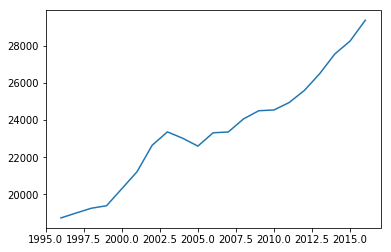

In [66]:
import matplotlib.pyplot as plt # matplotlib is plotting tool

plt.plot(years,UGDS_dat)
plt.show() # this plot has no annotation!  Wait for Chapter 5

### List comprehensions
- `[func(a) for a in list if bool_expr(a)]`
- think of as mapping and filter

### Iterables

- iter(iterable) -> iterator
- next(iterator) : returns next element

In [5]:
[i**2 for i in range(10) if i % 2 == 1] # square of odds

[1, 9, 25, 49, 81]

In [7]:
def proc_sou(line):
    """state of union line processing - in the future use Pandas"""
    line_date, line_rest = line.strip().split('",') # strip and split btw date/name
    line_date = line_date.strip('"') # remove "
    name, words = line_rest.split(',') # split name/words
    return(line_date,name,int(words)) # return - convert int

In [22]:
! head ../data/state_of_union.csv

date,name,words
"January 8, 1790",George Washington,1089
"December 8, 1790",George Washington,1401
"October 25, 1791",George Washington,2302
"November 6, 1792",George Washington,2101
"December 3, 1793",George Washington,1968
"November 19, 1794",George Washington,2918
"December 8, 1795",George Washington,1989
"December 7, 1796",George Washington,2871
"November 22, 1797",John Adams,2063


In [9]:
with open('../data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = [proc_sou(line) for line in sou] # list comp

In [10]:
# is same as
with open('../data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = []
    for line in sou:
        sou_data.append(proc_sou(line)) # append inserts at the end

In [11]:
## square first 10 non-neg ints
s = 0
for i in range(10):
    s += i**2
s

285

In [12]:
## square first 10 non-neg ints
s = 0
riter = iter(range(10)) # iter creates iterator
while True:
    s += next(riter)**2 # next returns next element

StopIteration: 

In [13]:
## square first 10 non-neg ints
s = 0
riter = iter(range(10))
while True:
    try:
        s += next(riter)**2
    except StopIteration: # Catch this exception
        break
s

285

In [14]:
## square first 10 non-neg ints
sum([i**2 for i in range(10)]) # list comp into sum

285

In [15]:
## square first 10 non-neg ints
sum(i**2 for i in range(10)) # generator expression into sum

285

In [16]:
# same thing as before
with open('../data/state_of_union.csv','r') as sou:
    sou_data = []
    sou_iter = iter(sou)
    head_temp = next(sou_iter) # skip the first line
    while True:
        try:
            line = next(sou_iter)
        except StopIteration:
            break
        sou_data.append(proc_sou(line))

In [17]:
# or just stick with
with open('../data/state_of_union.csv','r') as sou:
    head_temp = sou.readline() # skip the first line
    sou_data = [proc_sou(line) for line in sou] # list comp

In [20]:
# custom iterable
def sou_reader(filename):
    with open(filename,'r') as sou:
        _ = sou.readline() # skip first line
        for line in sou:
            yield proc_sou(line)

In [21]:
sou_r = sou_reader('../data/state_of_union.csv')
sou_data = [datum for datum in sou_r]

In [24]:
# The following data is from https://www.pombase.org/downloads/protein-datasets
# It contains the amino acid sequences for proteins in fission yeast

! head ../data/peptide.fa

>SPAC1002.01:pep
MLPPTIRISGLAKTLHIPSRSPLQALKGSFILLNKRKFHYSPFILQEKVQSSNHTIRSDT
KLWKRLLKITGKQAHQFKDKPFSHIFAFLFLHELSAILPLPIFFFIFHSLDWTPTGLPGE
YLQKGSHVAASIFAKLGYNLPLEKVSKTLLDGAAAYAVVKVSYFVENNMVSSTRPFVSN*
>SPAC1002.02:pep
MASTFSQSVFARSLYEDSAENKVDSSKNTEANFPITLPKVLPTDPKASSLHKPQEQQPNI
IPSKEEDKKPVINSMKLPSIPAPGTDNINESHIPRGYWKHPAVDKIAKRLHDQAPSDRTW
SRMVSNLFAFISIQFLNRYLPNTTAVKVVSWILQALLLFNLLESVWQFVRPQPTFDDLQL
TPLQRKLMGLPEGGSTSGKHLTPPRYRPNFSPSRKAENVKSPVRSTTWA*
>SPAC1002.03c:pep


In [25]:
def pep_reader(filename='../data/peptide.fa'):
    with open(filename,'r') as pepfile:
        pepname = False # start of file
        for line in pepfile: 
            if line[0] == '>': # check for prot id line
                if pepname:
                    yield (pepname,pepseq) # if not first output protein
                pepname = line.split(':')[0][1:] # get the id
                pepseq = "" # init seq
            else:
                pepseq += line.strip() # append to seq

In [28]:
pep = pep_reader() # init the iterator
pepdict = {k:v for k,v in pep} # make dictionary with gen expression

In [29]:
[k for i,k in enumerate(pepdict.keys()) if i < 10] # first 10 keys

['SPAC1002.01',
 'SPAC1002.02',
 'SPAC1002.03c',
 'SPAC1002.04c',
 'SPAC1002.05c',
 'SPAC1002.06c',
 'SPAC1002.07c',
 'SPAC1002.08c',
 'SPAC1002.09c',
 'SPAC1002.10c']

## Dictionaries form hash tables

- a hash function is used to give the keys integer ids (probably unique but maybe not)
- a hash table maps these ids to values

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Hash_table_3_1_1_0_1_0_0_SP.svg/315px-Hash_table_3_1_1_0_1_0_0_SP.svg.png)
*image from wikipedia

In [30]:
pepdict['SPAC1002.01'] # select element

'MLPPTIRISGLAKTLHIPSRSPLQALKGSFILLNKRKFHYSPFILQEKVQSSNHTIRSDTKLWKRLLKITGKQAHQFKDKPFSHIFAFLFLHELSAILPLPIFFFIFHSLDWTPTGLPGEYLQKGSHVAASIFAKLGYNLPLEKVSKTLLDGAAAYAVVKVSYFVENNMVSSTRPFVSN*'

In [32]:
hash('SPAC1002.01') # the hash value

7592352716679391596

In [33]:
pep = pep_reader() # init again
prot_ids, prot_seqs = zip(*pep) # make 2 lists
prot_ids = list(prot_ids)
prot_seqs = list(prot_seqs)

In [38]:
lastid = prot_ids[-1] # select last id

In [41]:
%time prot_seqs[prot_ids.index(lastid)] # time selecting using list.index

CPU times: user 73 µs, sys: 14 µs, total: 87 µs
Wall time: 88.9 µs


'MSAEDLFTIQILCDQIELKLASIVINSNIKLQLKRKKKTQQL*'

In [42]:
%time pepdict[lastid] # time select using dict

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


'MSAEDLFTIQILCDQIELKLASIVINSNIKLQLKRKKKTQQL*'